In [19]:
import pandas as pd
import numpy as np
import re

#datetime to parse dates
from datetime import datetime
from datetime import date
from datetime import time

# Define the file path (adjust the date string to match your file)
file_path = r"C:\Users\Kaity\Desktop\SchoolActivityDays\SANrawdata_2025-08-25.csv"

# Load the CSV into a DataFrame
sport_calendar_df = pd.read_csv(file_path)

# Quick checks
print(sport_calendar_df.shape)
print(sport_calendar_df.head())


(5026, 4)
          Sport        Date    Time                 School
0          Golf  2024-08-05     TBD  Riverbend High School
1          Golf  2024-08-07     TBD  Riverbend High School
2          Golf  2024-08-14  4:00pm  Riverbend High School
3  Field Hockey  2024-08-14  5:00pm  Riverbend High School
4  Field Hockey  2024-08-14  6:30pm  Riverbend High School


In [21]:
import os

# Set working directory to folder
os.chdir(r"C:\Users\Kaity\Desktop\SchoolActivityDays")

# Confirm it's set correctly
print("Current working directory:", os.getcwd())


Current working directory: C:\Users\Kaity\Desktop\SchoolActivityDays


In [23]:
# Make sure the 'date' column is in datetime format
sport_calendar_df['Date'] = pd.to_datetime(sport_calendar_df['Date'])

# Create a new column with the day of the week (e.g., Monday, Tuesday, etc.)
sport_calendar_df['Weekday'] = sport_calendar_df['Date'].dt.day_name()

# Preview
print(sport_calendar_df[['Date', 'Weekday']].head())

        Date    Weekday
0 2024-08-05     Monday
1 2024-08-07  Wednesday
2 2024-08-14  Wednesday
3 2024-08-14  Wednesday
4 2024-08-14  Wednesday


In [25]:
print(len(sport_calendar_df))

5026


In [27]:
#Explore the dataset
# How many events per school
print("Events per school:")
print(sport_calendar_df['School'].value_counts())

Events per school:
School
Chancellor High School      1989
Courtland High School       1022
Massaponax High School       802
Riverbend High School        653
Spotsylvania High School     560
Name: count, dtype: int64


In [29]:
#WHy so many Chancellor events?
#Look at Chancellor Basketball events
basketball_events = sport_calendar_df[
    (sport_calendar_df['School']=="Chancellor High School") &
    (sport_calendar_df['Sport']=="Basketball")
]

print(basketball_events[['Date','Time','Sport']].head(5))

           Date             Time       Sport
2533 2024-08-17  9:00am - 1:00pm  Basketball
2578 2024-08-24  9:00am - 1:00pm  Basketball
2627 2024-08-31  9:00am - 1:00pm  Basketball
2674 2024-09-07  9:00am - 1:00pm  Basketball
2723 2024-09-14  9:00am - 1:00pm  Basketball


In [31]:
# Mark duplicates based on the three key columns
dupes = sport_calendar_df[sport_calendar_df.duplicated(subset=['School','Date','Sport'], keep=False)]

# Peek at them
print(f"Found {len(dupes)} duplicate rows based on School, Date, Sport")
dupes.sort_values(['School','Date','Sport']).head(20)  # show first 20 neatly

Found 2547 duplicate rows based on School, Date, Sport


,Sport,Date,Time,School,Weekday
2521,Field Hockey,2024-08-15,5:30pm,Chancellor High School,Thursday
2523,Field Hockey,2024-08-15,6:45pm,Chancellor High School,Thursday
2516,Sports Day,2024-08-15,2:30pm - 5:00pm,Chancellor High School,Thursday
2517,Sports Day,2024-08-15,2:30pm - 5:00pm,Chancellor High School,Thursday
2531,Football,2024-08-17,9:00am,Chancellor High School,Saturday
2532,Football,2024-08-17,9:00am,Chancellor High School,Saturday
2564,Volleyball,2024-08-22,5:00pm,Chancellor High School,Thursday
2566,Volleyball,2024-08-22,6:30pm,Chancellor High School,Thursday
2570,Football,2024-08-23,2:30pm - 5:30pm,Chancellor High School,Friday
2574,Football,2024-08-23,6:00pm,Chancellor High School,Friday


In [33]:
# Remove duplicates on key columns
games_only = sport_calendar_df.drop_duplicates(subset=['School','Date','Sport'])

len(games_only)

3503

In [35]:
sport_calendar_df = games_only

In [37]:
print("Events per school:")
print(sport_calendar_df['School'].value_counts())

Events per school:
School
Chancellor High School      1635
Courtland High School        742
Massaponax High School       487
Riverbend High School        332
Spotsylvania High School     307
Name: count, dtype: int64


In [39]:
outdoor_track_events = sport_calendar_df[sport_calendar_df['Sport'] == "Outdoor Track"]

print(outdoor_track_events)

              Sport       Date    Time                    School    Weekday
454   Outdoor Track 2025-04-05  9:00am     Riverbend High School   Saturday
466   Outdoor Track 2025-04-09  4:00pm     Riverbend High School  Wednesday
479   Outdoor Track 2025-04-11  8:30am     Riverbend High School     Friday
498   Outdoor Track 2025-04-16  4:00pm     Riverbend High School  Wednesday
509   Outdoor Track 2025-04-22  4:00pm     Riverbend High School    Tuesday
...             ...        ...     ...                       ...        ...
4958  Outdoor Track 2025-05-07  4:30pm  Spotsylvania High School  Wednesday
4983  Outdoor Track 2025-05-14  2:00pm  Spotsylvania High School  Wednesday
4998  Outdoor Track 2025-05-19  2:00pm  Spotsylvania High School     Monday
5015  Outdoor Track 2025-05-23  2:00pm  Spotsylvania High School     Friday
5018  Outdoor Track 2025-05-24  9:00am  Spotsylvania High School   Saturday

[61 rows x 5 columns]


In [41]:
basketball_events = sport_calendar_df[
    (sport_calendar_df['School']=="Chancellor High School") &
    (sport_calendar_df['Sport']=="Basketball")
]

print(basketball_events)

           Sport       Date             Time                  School   Weekday
2533  Basketball 2024-08-17  9:00am - 1:00pm  Chancellor High School  Saturday
2578  Basketball 2024-08-24  9:00am - 1:00pm  Chancellor High School  Saturday
2627  Basketball 2024-08-31  9:00am - 1:00pm  Chancellor High School  Saturday
2674  Basketball 2024-09-07  9:00am - 1:00pm  Chancellor High School  Saturday
2723  Basketball 2024-09-14  9:00am - 1:00pm  Chancellor High School  Saturday
2774  Basketball 2024-09-21  9:00am - 1:00pm  Chancellor High School  Saturday
2887  Basketball 2024-10-05  9:00am - 1:00pm  Chancellor High School  Saturday
2931  Basketball 2024-10-12  9:00am - 1:00pm  Chancellor High School  Saturday
2978  Basketball 2024-10-19  9:00am - 1:00pm  Chancellor High School  Saturday
3074  Basketball 2024-11-02  9:00am - 1:00pm  Chancellor High School  Saturday
3116  Basketball 2024-11-09  9:00am - 1:00pm  Chancellor High School  Saturday
3151  Basketball 2024-11-18           5:00pm  Chance

In [43]:
# Count events per school per sport
school_sport_counts = sport_calendar_df.groupby(['School','Sport']).size().reset_index(name='EventCount')

# Filter just Chancellor
chancellor_sports = school_sport_counts[school_sport_counts['School']=="Chancellor High School"]

print(chancellor_sports.sort_values('EventCount', ascending=False))

                    School                   Sport  EventCount
41  Chancellor High School                Football         120
5   Chancellor High School                Baseball         109
44  Chancellor High School        Girls Basketball          98
14  Chancellor High School         Boys Basketball          90
74  Chancellor High School                Softball          73
..                     ...                     ...         ...
65  Chancellor High School                    Prom           1
66  Chancellor High School  Rising 9th grade night           1
16  Chancellor High School    Boys soccer interest           1
69  Chancellor High School          Senior Sunrise           1
0   Chancellor High School                 4E Expo           1

[98 rows x 3 columns]


In [45]:
# Now we want to remove all the events that are not the main sports we are interested in

# List of allowed sport keywords (substrings) - removing extra events
allowed_sports = [
    "Golf", "Field Hockey", "Football", "Volleyball", "Sideline Cheer Fall", 
    "Cross Country", "Competition Cheer", "Basketball", "Wrestling", 
    "Swim & Dive", "Indoor Track", "Lacrosse", "Tennis", "Softball", 
    "Baseball", "Soccer", "Outdoor Track", "Swim", 
    "Girls Soccer", "Girls Basketball", "Girls Lacrosse", 
    "Boys Soccer", "Boys Lacrosse", "Boys Basketball"
]

# Build regex pattern from keywords
pattern = '|'.join(allowed_sports)

# Keep only rows where Sport contains one of the allowed substrings
sport_calendar_df = sport_calendar_df[sport_calendar_df['Sport'].str.contains(pattern, case=False, na=False)]

# Reset index for cleanliness
sport_calendar_df = sport_calendar_df.reset_index(drop=True)

#Ban more events, such as those for middle school or other leagues, that aren't relevant to our question
#List of "sports" to exclude
ban_list = [
    "Seniors vs Staff Basketball Game",
    "Soccer Officials",
    "American Youth Football (AYF) - Games",
    "Soccer Tots",
    "Middle School Football Championship Game",
    "Middle School Football Game",
    "VAYFA - Youth Football Games",
    "Virginia Jags - Youth Football Games",
    "SCPS Middle School Football Semi-Final",
    "POMS Football",
        
]
ban_pattern = re.compile("|".join(re.escape(x) for x in ban_list), flags=re.IGNORECASE)


# apply filter (assuming column is called 'Sport' or 'Event')
col_to_check = 'Sport' if 'Sport' in sport_calendar_df.columns else 'Event'

# keep only rows that do NOT match the banned list
sport_calendar_df = sport_calendar_df[
    ~sport_calendar_df[col_to_check].astype(str).str.contains(ban_pattern, na=False)
]

#Simplify Sport column values so they just say the sport, no extra words

df = sport_calendar_df.copy()

# Define the canonical sports we want to keep
canonical_sports = [
    "Golf", "Field Hockey", "Football", "Volleyball", "Sideline Cheer Fall",
    "Cross Country", "Competition Cheer", "Basketball", "Wrestling",
    "Swim & Dive", "Indoor Track", "Lacrosse", "Tennis",
    "Softball", "Baseball", "Soccer", "Outdoor Track", "Swim",
    "Girls Soccer", "Girls Basketball", "Boys Soccer", "Boys Basketball",
    "Girls Lacrosse", "Boys Lacrosse"
]

# Make a regex mapping (search keywords -> canonical name)
mapping = {
    r"golf": "Golf",
    r"field hockey": "Field Hockey",
    r"football": "Football",
    r"volleyball": "Volleyball",
    r"sideline cheer": "Sideline Cheer Fall",
    r"cross country": "Cross Country",
    r"competition cheer": "Competition Cheer",
    r"basketball": "Basketball",
    r"wrestling": "Wrestling",
    r"swim": "Swim & Dive",
    r"indoor track": "Indoor Track",
    r"lacrosse": "Lacrosse",
    r"tennis": "Tennis",
    r"softball": "Softball",
    r"baseball": "Baseball",
    r"soccer": "Soccer",
    r"outdoor track": "Outdoor Track",
}

# Function to normalize one sport string
def normalize_sport(value):
    val = str(value).lower()
    for pattern, replacement in mapping.items():
        if re.search(pattern, val):
            return replacement
    return value  # keep original if no match

df['Sport'] = df['Sport'].apply(normalize_sport)

# Check results
print(df['Sport'].unique())

['Golf' 'Field Hockey' 'Football' 'Volleyball' 'Sideline Cheer Fall'
 'Cross Country' 'Competition Cheer' 'Basketball' 'Wrestling'
 'Swim & Dive' 'Indoor Track' 'Lacrosse' 'Tennis' 'Softball' 'Baseball'
 'Soccer' 'Outdoor Track']


In [47]:
print(len(df))

2493


In [49]:
#Merge back to main branch
sport_calendar_df = df

In [51]:
# Convert "4:00pm" strings to datetime.time
sport_calendar_df['Time_dt'] = pd.to_datetime(
    sport_calendar_df['Time'], format='%I:%M%p', errors='coerce'
).dt.time


In [53]:
#Explore the dataset
# How many events per school
print("Events per school:")
print(sport_calendar_df['School'].value_counts())

Events per school:
School
Chancellor High School      1219
Massaponax High School       351
Courtland High School        325
Riverbend High School        322
Spotsylvania High School     276
Name: count, dtype: int64


In [55]:
#Why does Chancellor still have so many events?

# Count events per school per sport
school_sport_counts = sport_calendar_df.groupby(['School','Sport']).size().reset_index(name='EventCount')

# Filter just Chancellor
chancellor_sports = school_sport_counts[school_sport_counts['School']=="Chancellor High School"]

print(chancellor_sports.sort_values('EventCount', ascending=False))


                    School              Sport  EventCount
1   Chancellor High School         Basketball         235
9   Chancellor High School             Soccer         154
5   Chancellor High School           Football         122
0   Chancellor High School           Baseball         117
10  Chancellor High School           Softball          73
4   Chancellor High School       Field Hockey          70
13  Chancellor High School         Volleyball          68
12  Chancellor High School             Tennis          67
14  Chancellor High School          Wrestling          67
3   Chancellor High School      Cross Country          66
7   Chancellor High School       Indoor Track          66
11  Chancellor High School        Swim & Dive          60
6   Chancellor High School               Golf          40
8   Chancellor High School      Outdoor Track          12
2   Chancellor High School  Competition Cheer           2


In [57]:
# Filter rows where the Event column contains "Football"
football_events = sport_calendar_df[sport_calendar_df['Sport'].str.contains("Football", case=False, na=False)]

# Show results
print(f"Found {len(football_events)} football events")
football_events.tail(60)  # Show first 20 results

Found 225 football events


,Sport,Date,Time,School,Weekday,Time_dt
1896,Football,2025-03-13,6:00pm - 7:00pm,Chancellor High School,Thursday,NaT
1903,Football,2025-03-17,2:30pm - 4:00pm,Chancellor High School,Monday,NaT
1915,Football,2025-03-19,2:30pm - 4:00pm,Chancellor High School,Wednesday,NaT
1922,Football,2025-03-20,2:30pm - 4:00pm,Chancellor High School,Thursday,NaT
1934,Football,2025-03-24,2:30pm - 4:00pm,Chancellor High School,Monday,NaT
1945,Football,2025-03-26,2:30pm - 4:00pm,Chancellor High School,Wednesday,NaT
1952,Football,2025-03-27,2:30pm - 4:00pm,Chancellor High School,Thursday,NaT
1964,Football,2025-03-31,2:30pm - 4:00pm,Chancellor High School,Monday,NaT
1975,Football,2025-04-02,2:30pm - 4:00pm,Chancellor High School,Wednesday,NaT
1983,Football,2025-04-03,2:30pm - 4:00pm,Chancellor High School,Thursday,NaT


In [60]:
#We still have basketball events showing up outside of basketball season, and that may be true for other sports as well, so we're going to define the sport seasons, and remove all events that are outside that season.

#start with a copy of the dataframe
df = sport_calendar_df.copy()

# --- 1) Parse the event date ---
# Replace 'Date' below with your actual date column if different.

df['EventDate'] = pd.to_datetime(df['Date'], errors='coerce')

# --- 3) Define season windows (inclusive) ---
# Dates given for Fredericksburg area 2024–25 seasons.
# Use precise dates you provided; "~" dates set to concrete start dates below.
seasons = {
    'Competition Cheer': ('2024-07-31', '2024-11-10'),
    'Field Hockey':      ('2024-08-04', '2024-11-10'),
    'Football':          ('2024-07-31', '2024-12-15'),
    'Volleyball':        ('2024-08-04', '2024-11-30'),
    'Basketball':        ('2024-11-11', '2025-03-30'),
    'Swim & Dive':       ('2024-11-11', '2025-02-22'),
    'Wrestling':         ('2024-11-11', '2025-02-22'),
    'Baseball':          ('2025-02-24', '2025-06-14'),
    'Softball':          ('2025-02-24', '2025-06-14'),
    'Soccer':            ('2025-02-24', '2025-06-14'),
    # Newly requested sports:
    'Golf':              ('2024-07-29', '2024-10-15'),
    # Sideline cheer spans football & basketball seasons; adjust if you split by season.
    'Sideline Cheer':    ('2024-08-01', '2025-03-30'),
    'Cross Country':     ('2024-08-05', '2024-11-16'),
    'Indoor Track':      ('2024-11-11', '2025-03-06'),

    # As requested: start Mar 1, end mid-May
    'Lacrosse':          ('2025-03-01', '2025-05-15'),
    'Tennis':            ('2025-03-01', '2025-05-15'),
    'Outdoor Track':     ('2025-03-01', '2025-05-15'),
}

seasons_df = (
    pd.DataFrame.from_dict(seasons, orient='index', columns=['season_start', 'season_end'])
      .rename_axis('Sport')
      .reset_index()
)
seasons_df['season_start'] = pd.to_datetime(seasons_df['season_start'])
seasons_df['season_end']   = pd.to_datetime(seasons_df['season_end'])

# --- 4) Join seasons onto events ---
df = df.merge(seasons_df, on='Sport', how='left')

# --- 5) Keep only events that fall within the sport’s season window ---
# This automatically excludes Open Gym (or any event type) if it lands outside the season dates,
# while keeping practices/games/etc. that are in-season.
in_season_mask = (
    df['EventDate'].notna()
    & df['season_start'].notna()
    & df['season_end'].notna()
    & df['EventDate'].between(df['season_start'], df['season_end'], inclusive='both')
)

filtered_df = df.loc[in_season_mask].copy()


print(f"Original rows: {len(df)}")
print(f"Kept rows (in-season only): {len(filtered_df)}")
print(f"Dropped rows (out-of-season or unrecognized sport/date): {len(df) - len(filtered_df)}")

Original rows: 2493
Kept rows (in-season only): 2141
Dropped rows (out-of-season or unrecognized sport/date): 352


In [62]:
# Filter rows where the Event column contains "Football"
football_events = filtered_df[filtered_df['Sport'].str.contains("Football", case=False, na=False)]

# Show results
print(f"Found {len(football_events)} football events")
football_events.tail(60)  # Show first 20 results

Found 169 football events


,Sport,Date,Time,School,Weekday,Time_dt,EventDate,season_start,season_end
1187,Football,2024-09-19,2:30pm - 5:30pm,Chancellor High School,Thursday,NaT,2024-09-19,2024-07-31,2024-12-15
1193,Football,2024-09-20,2:30pm - 5:30pm,Chancellor High School,Friday,NaT,2024-09-20,2024-07-31,2024-12-15
1199,Football,2024-09-23,2:30pm - 5:30pm,Chancellor High School,Monday,NaT,2024-09-23,2024-07-31,2024-12-15
1206,Football,2024-09-24,2:30pm - 5:30pm,Chancellor High School,Tuesday,NaT,2024-09-24,2024-07-31,2024-12-15
1212,Football,2024-09-25,2:30pm - 5:30pm,Chancellor High School,Wednesday,NaT,2024-09-25,2024-07-31,2024-12-15
1221,Football,2024-09-26,2:30pm - 5:30pm,Chancellor High School,Thursday,NaT,2024-09-26,2024-07-31,2024-12-15
1228,Football,2024-09-27,2:30pm - 5:30pm,Chancellor High School,Friday,NaT,2024-09-27,2024-07-31,2024-12-15
1233,Football,2024-09-30,2:30pm - 5:30pm,Chancellor High School,Monday,NaT,2024-09-30,2024-07-31,2024-12-15
1241,Football,2024-10-01,2:30pm - 5:30pm,Chancellor High School,Tuesday,NaT,2024-10-01,2024-07-31,2024-12-15
1248,Football,2024-10-02,2:30pm - 5:30pm,Chancellor High School,Wednesday,NaT,2024-10-02,2024-07-31,2024-12-15


In [64]:
sport_calendar_df = filtered_df

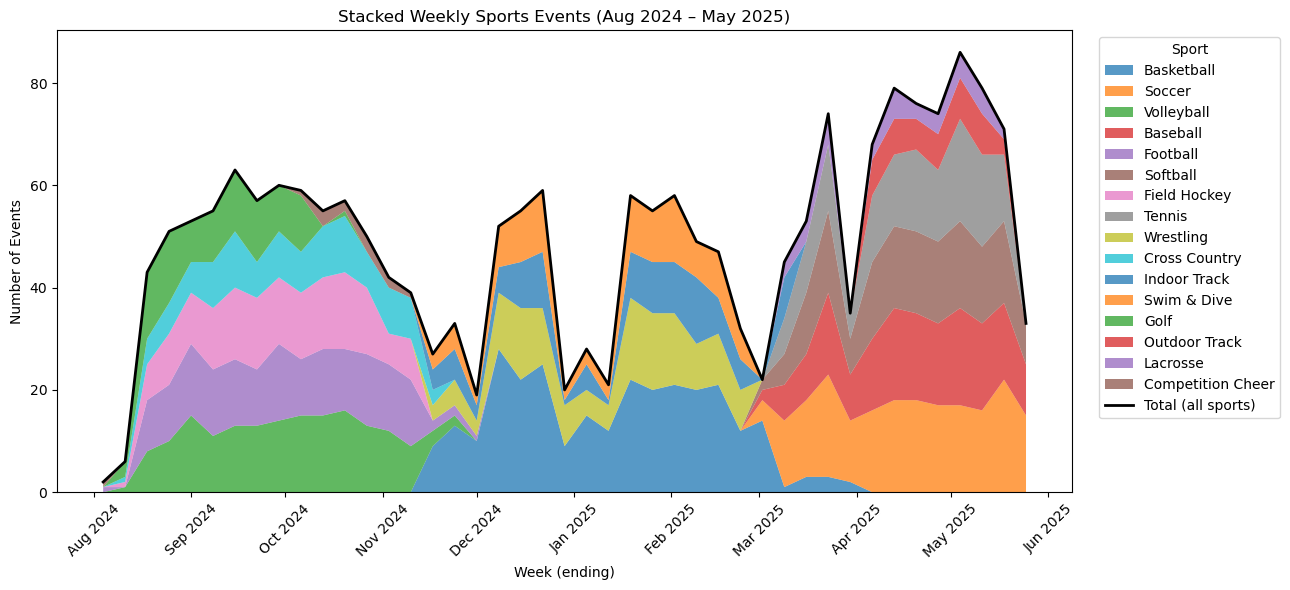

In [66]:
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter
from matplotlib.patches import Patch

# ---- Inputs you can tweak ----
START = "2024-08-01"
END   = "2025-05-31"
WEEK_FREQ = "W-SUN"   # week ends on Sunday. Alternatives: "W-SAT", "W-MON", etc.

# ---- 1) Ensure datetime ----
df = sport_calendar_df.copy()
df['EventDate'] = pd.to_datetime(df['EventDate'], errors='coerce')

# ---- 2) Weekly counts per sport ----
weekly_counts = (
    df
    .groupby([pd.Grouper(key='EventDate', freq=WEEK_FREQ), 'Sport'])
    .size()
    .reset_index(name='count')
)

pivot = weekly_counts.pivot(index='EventDate', columns='Sport', values='count').fillna(0)

# ---- 3) Ensure every week in the range appears (even if zero) ----
weekly_index = pd.date_range(start=START, end=END, freq=WEEK_FREQ)
pivot = pivot.reindex(weekly_index, fill_value=0)

# Optional: order sports by total volume (largest first looks nicer in stacks)
sport_order = pivot.sum(axis=0).sort_values(ascending=False).index.tolist()
pivot = pivot[sport_order]

# ---- 4) Plot stacked weekly area + total line ----
x = pivot.index
y = pivot.T.values  # (n_sports, n_weeks)

plt.figure(figsize=(13, 6))

# Stacked areas (matplotlib assigns distinct colors)
stack_handles = plt.stackplot(x, y, labels=pivot.columns, alpha=0.75)

# Total line
total = pivot.sum(axis=1)
plt.plot(x, total, linewidth=2, label='Total (all sports)', color='black')

# Title/labels
plt.title("Stacked Weekly Sports Events (Aug 2024 – May 2025)")
plt.xlabel("Week (ending)")
plt.ylabel("Number of Events")

# Month ticks to avoid crowding
plt.gca().xaxis.set_major_locator(MonthLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%b %Y'))
plt.xticks(rotation=45)

# Legend: colored patches per sport + total line
area_patches = [Patch(facecolor=h.get_facecolor()[0], label=lbl) for h, lbl in zip(stack_handles, pivot.columns)]
total_line = plt.Line2D([0], [0], linewidth=2, color='black', label='Total (all sports)')
plt.legend(handles=area_patches + [total_line], title="Sport", bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()



In [68]:
#Filter out events that are earlier in the day and won't affect youth group attendance
df = sport_calendar_df.copy()

# Split on "-" in case of ranges like "5:30pm - 7:00pm"
time_split = df['Time'].str.split('-', n=1, expand=True)

# 2) Parse start/end (tolerant to spaces/case); coerce bad/TBD to NaT
start_ts = pd.to_datetime(time_split[0].str.strip(), format='%I:%M%p', errors='coerce')
end_ts   = pd.to_datetime(time_split[1].str.strip(), format='%I:%M%p', errors='coerce') if time_split.shape[1] > 1 else pd.Series(pd.NaT, index=df.index)

# 3) Convert to minutes since midnight to make overlap math easy
def to_minutes(ts):
    if pd.isna(ts):
        return np.nan
    return ts.hour * 60 + ts.minute

df['start_min'] = start_ts.apply(to_minutes)
df['end_min_raw'] = end_ts.apply(to_minutes)

# 4) If end is missing but start exists, assume a default duration (e.g., 120 minutes)
DEFAULT_DURATION_MIN = 180
df['end_min'] = np.where(
    df['end_min_raw'].notna(),
    df['end_min_raw'],
    np.where(df['start_min'].notna(), df['start_min'] + DEFAULT_DURATION_MIN, np.nan)
)

# 5) If start is missing but end exists, backfill a start by default duration
df['start_min'] = np.where(
    df['start_min'].notna(),
    df['start_min'],
    np.where(df['end_min_raw'].notna(), df['end_min_raw'] - DEFAULT_DURATION_MIN, np.nan)
)

# 6) Define the target "youth group impact" window: 5–9 PM
WIN_START = 17 * 60  # 17:00
WIN_END   = 21 * 60  # 21:00

# 7) Keep events whose [start, end] overlaps [WIN_START, WIN_END)
# Overlap condition: start < WIN_END AND end > WIN_START
overlaps = (df['start_min'] < WIN_END) & (df['end_min'] > WIN_START)

# (Optional) keep TBD times anyway:
keep_tbd = df['start_min'].isna() & df['end_min'].isna()

filtered_df = df.loc[overlaps | keep_tbd].copy()

print(f"Original rows: {len(df)}")

print(f"Kept rows (overlap 5–9pm or TBD): {len(filtered_df)}")

Original rows: 2141
Kept rows (overlap 5–9pm or TBD): 1763


In [70]:
sport_evenings_df = filtered_df

In [72]:
outdoor_track_events = sport_calendar_df[sport_calendar_df['Sport'] == "Outdoor Track"].shape[0]

print(f"Number of outdoor track events: {outdoor_track_events}")

Number of outdoor track events: 46


In [74]:
outdoor_track_events = sport_evenings_df[sport_evenings_df['Sport'] == "Outdoor Track"].shape[0]

print(f"Number of outdoor track events: {outdoor_track_events}")

Number of outdoor track events: 31


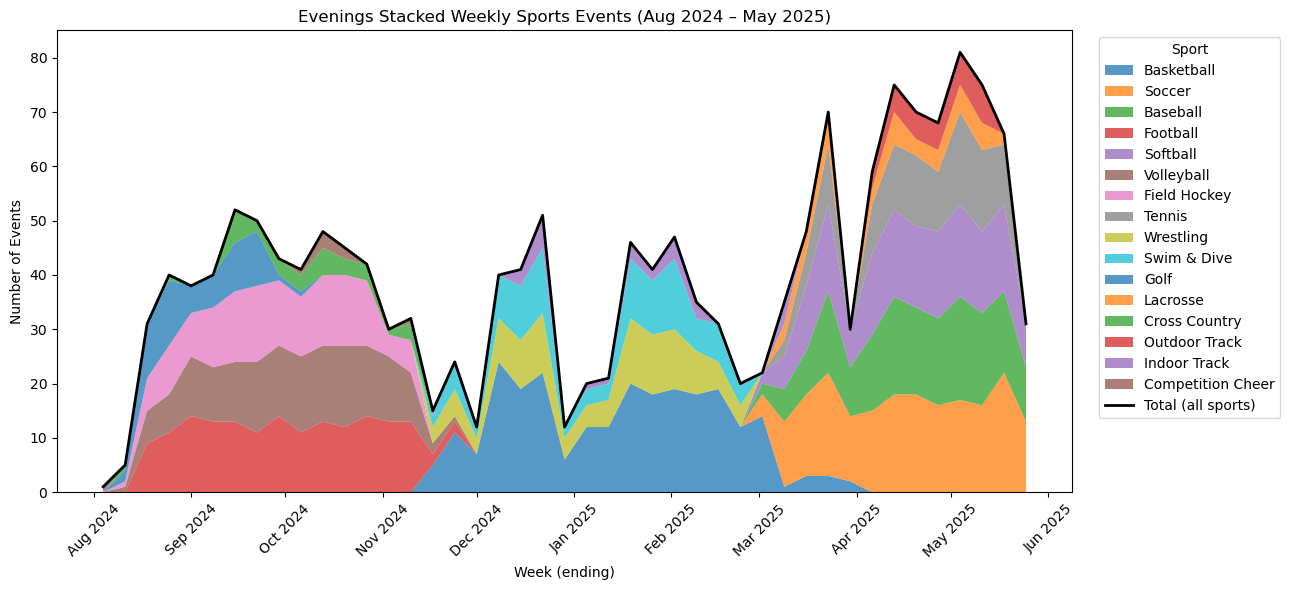

In [76]:

# ---- Inputs you can tweak ----
START = "2024-08-01"
END   = "2025-05-31"
WEEK_FREQ = "W-SUN"   # week ends on Sunday. Alternatives: "W-SAT", "W-MON", etc.

# ---- 1) Ensure datetime ----
# Assumes you already have a filtered_df from the season filter and a 'Sport' column
df = sport_evenings_df.copy()
df['EventDate'] = pd.to_datetime(df['EventDate'], errors='coerce')

# ---- 2) Weekly counts per sport ----
weekly_counts = (
    df
    .groupby([pd.Grouper(key='EventDate', freq=WEEK_FREQ), 'Sport'])
    .size()
    .reset_index(name='count')
)

pivot = weekly_counts.pivot(index='EventDate', columns='Sport', values='count').fillna(0)

# ---- 3) Ensure every week in the range appears (even if zero) ----
weekly_index = pd.date_range(start=START, end=END, freq=WEEK_FREQ)
pivot = pivot.reindex(weekly_index, fill_value=0)

# Optional: order sports by total volume (largest first looks nicer in stacks)
sport_order = pivot.sum(axis=0).sort_values(ascending=False).index.tolist()
pivot = pivot[sport_order]

# ---- 4) Plot stacked weekly area + total line ----
x = pivot.index
y = pivot.T.values  # (n_sports, n_weeks)

plt.figure(figsize=(13, 6))

# Stacked areas (matplotlib assigns distinct colors)
stack_handles = plt.stackplot(x, y, labels=pivot.columns, alpha=0.75)

# Total line
total = pivot.sum(axis=1)
plt.plot(x, total, linewidth=2, label='Total (all sports)', color='black')

# Title/labels
plt.title("Evenings Stacked Weekly Sports Events (Aug 2024 – May 2025)")
plt.xlabel("Week (ending)")
plt.ylabel("Number of Events")

# Month ticks to avoid crowding
plt.gca().xaxis.set_major_locator(MonthLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%b %Y'))
plt.xticks(rotation=45)

# Legend: colored patches per sport + total line
area_patches = [Patch(facecolor=h.get_facecolor()[0], label=lbl) for h, lbl in zip(stack_handles, pivot.columns)]
total_line = plt.Line2D([0], [0], linewidth=2, color='black', label='Total (all sports)')
plt.legend(handles=area_patches + [total_line], title="Sport", bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [78]:
print(sport_calendar_df.columns)

print(sport_evenings_df.columns)


Index(['Sport', 'Date', 'Time', 'School', 'Weekday', 'Time_dt', 'EventDate',
       'season_start', 'season_end'],
      dtype='object')
Index(['Sport', 'Date', 'Time', 'School', 'Weekday', 'Time_dt', 'EventDate',
       'season_start', 'season_end', 'start_min', 'end_min_raw', 'end_min'],
      dtype='object')


In [80]:
# Set output folder
output_folder = r"C:\Users\Kaity\Desktop\SchoolActivityDays"

# Create a timestamp (YYYY-MM-DD_HH-MM-SS format)
timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

# Build the filename with the timestamp
filename = f"SANcleaned_{timestamp}.csv"

# Save your main cleaned dataframe
output_path = os.path.join(output_folder, filename)
sport_calendar_df.to_csv(output_path, index=False)

print(f"File saved successfully: {output_path}")


File saved successfully: C:\Users\Kaity\Desktop\SchoolActivityDays\SANcleaned_2025-09-15_11-32-57.csv


In [82]:
# when saving:
sport_calendar_df.to_csv(os.path.join(output_folder, "SANcleaned_latest.csv"), index=False)

In [84]:
# Set output folder
output_folder = r"C:\Users\Kaity\Desktop\SchoolActivityDays"

# Create a timestamp (YYYY-MM-DD_HH-MM-SS format)
timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

# Build the filename with the timestamp
filename = f"Evenings_SANcleaned_{timestamp}.csv"

# Save your main cleaned dataframe
output_path = os.path.join(output_folder, filename)
sport_evenings_df.to_csv(output_path, index=False)

print(f"File saved successfully: {output_path}")

File saved successfully: C:\Users\Kaity\Desktop\SchoolActivityDays\Evenings_SANcleaned_2025-09-15_11-33-06.csv


In [86]:
# when saving:
sport_evenings_df.to_csv(os.path.join(output_folder, "Evenings_SANcleaned_latest.csv"), index=False)